<a href="https://colab.research.google.com/github/RochitJain/ML_AI/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC**

In [42]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
# df.info()
# df.isnull().sum()
df = df.drop(['who','adult_male','deck','embark_town'],axis=1)


In [ ]:
df.isnull().sum()
# df.nunique()
# df = df.drop('alive',axis=1)


In [56]:
# df.describe(include='object')
df['age']= df['age'].fillna(df['age'].median())
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

In [63]:
df['family_size'] = df['parch']+ df['sibsp']
df = df.drop(['parch','sibsp'],axis=1)

In [66]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
X = df.drop(['survived'],axis=1)
y= df['survived']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=11)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models ={
    'Logistic': LogisticRegression(),
    'Random': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
from sklearn.model_selection import cross_val_score

for name,model in models.items():
  scores = cross_val_score(model,X_train,y_train,cv=5, scoring='accuracy')
  print(f"{name}: CV Accuracy = {scores.mean():.4f}")

In [75]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

best_model

RandomForestClassifier(max_depth=7)

Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       118
           1       0.81      0.72      0.77        61

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



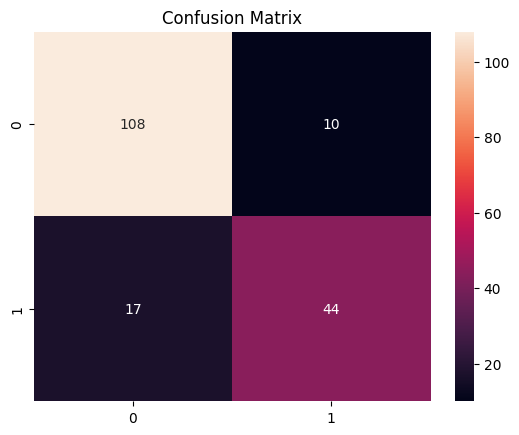

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()